In [8]:
import json
import matplotlib.pyplot as plt
import plotly.graph_objs as go

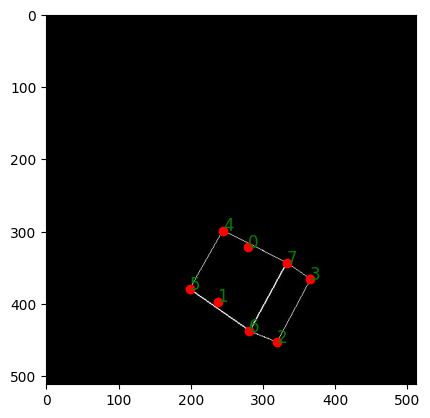

In [12]:
img_idx = 0

with open("../annotations.json", "r") as f:
    data = json.load(f)

data = data[img_idx]
img = plt.imread("../wireframes/" + str(img_idx) + ".jpg")
projection = data["projection"]

for i, point in enumerate(projection[:8]):
    plt.scatter(point[0], point[1], c="red")
    plt.text(point[0], point[1], str(f"{i}"), color="green", fontsize=12)
    
plt.imshow(img)

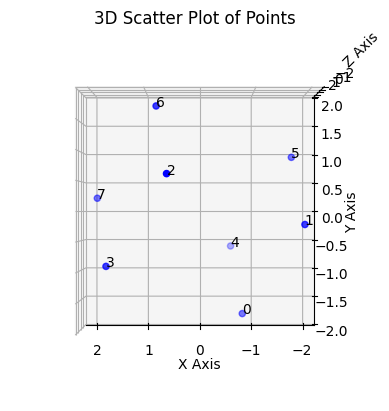

In [13]:
# Separate the list of points into individual lists for x, y, and z coordinates
points = data["world"]
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]
z_coords = [point[2] for point in points]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(x_coords, y_coords, z_coords, c='blue', marker='o')

# Label each point with its index
for i, (x, y, z) in enumerate(points):
    ax.text(x, y, z, f'{i}', color='black', fontsize=10)

# Add labels for axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot of Points')

# Change the view angle
ax.view_init(elev=-90, azim=90)  # Elevation and azimuth

# Show the plot
plt.show()

In [14]:
# Create the 3D scatter plot
trace = go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers+text',
    marker=dict(size=8, color='blue', opacity=0.8),
    text=[str(i) for i in range(len(points))],
    textposition='top center'
)

# Set up the layout
layout = go.Layout(
    title='3D Scatter Plot of Points (Plotly)',
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis'),
         camera=dict(
            eye=dict(x=0, y=0, z=-15),  # Equivalent to the eye in gluLookAt
            center=dict(x=0, y=0, z=0),  # Point to look at
            up=dict(x=0, y=1, z=0)  # Up direction
        )
    )
)

# Create the figure and specify the renderer
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="browser")